In [8]:
import qiskit
import numpy  as np
from matplotlib import pyplot as plt 
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name


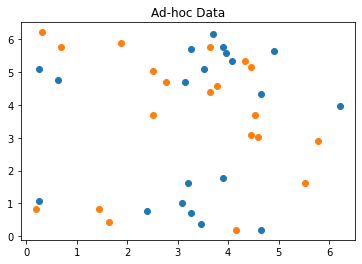

{'A': 0, 'B': 1}


In [9]:
feature_dimesion = 2
training_datasets_size = 20
testing_dataset_size = 10
random_seed = 10598
shots = 10000

sample_total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_datasets_size,
                                                                    test_size=testing_dataset_size,
                                                                    gap=0.3,
                                                                    n=feature_dimesion,
                                                                    plot_data=True)
datapoints, class_to_labels = split_dataset_to_data_and_labels(test_input)
print(class_to_labels)

In [10]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimesion,reps=2)
svm = QSVM(feature_map,training_input,test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend,shots=shots, seed_simulator=random_seed,seed_transpiler=random_seed)
result  = svm.run(quantum_instance)

kernel matrix during the training


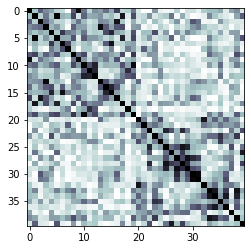

In [11]:
print("kernel matrix during the training")
kernel_matrix  = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

In [14]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels,svm.label_to_class)
print('ground truth:  {}'.format(datapoints[1]))
print('prediction:  {}'.format(predicted_labels))
print('testing sucess ratio:',result['testing_accuracy'])

ground truth:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing sucess ratio: 1.0
